LETS BUILD A DUMMY DATA SET

In [2]:
from sklearn.datasets import make_classification
import pandas as pd
x,y=make_classification(n_samples=500,n_classes=2,n_features=2,n_redundant=0,random_state=1)
df=pd.DataFrame(x,columns=['a','b']);yz=pd.Series(y)
df['class']=yz
df.head(8)


,a,b,class
0,0.338646,1.249830,1
1,-0.563797,-2.491263,0
2,-1.109679,1.218060,1
3,-0.537839,-0.538825,1
4,-1.224435,0.863677,1
5,-0.778989,-1.145321,0
6,-1.238872,1.615416,1
7,0.981708,1.059250,1


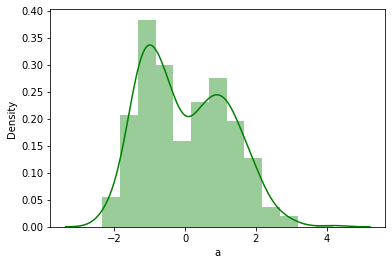

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.distplot(df['a'],color='g') 

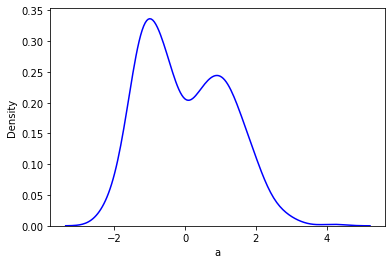

In [ ]:
#pdf plot 
sns.kdeplot(df['a'],color='b')

In [4]:
import warnings
warnings.filterwarnings('ignore')
import scipy as st
from scipy.stats import variation
import  scipy.stats  as sts

print('the mean of first feature of the dataset is ', st.mean(df['a']))
print('the variance of the first feature is',(variation(df['a'])*st.mean(df['a']))**2)
print('the standard deviation of the first feature is ',sts.tstd(df['a']))

the mean of first feature of the dataset is  0.005653326000289569
the variance of the first feature is 1.432127849654984
the standard deviation of the first feature is  1.1979139557354177


In [5]:
#FINDING z-scores

print('z scores ',sts.zscore(df['a'])[:5])

# for suppose if we have probabilty from right say 0.95, what is the zscore respective to it
print('z score to the right of 0.95',sts.norm.ppf(1.0-.95))
#points which are above 0.95 percent
print('  ')
print('points which are located above 0.95 prob',df['a'][sts.zscore(df['a'])<sts.norm.ppf(1.0-.95)])

#for suppose if we have probabilty from left say 0.25, what is the zscore respective to it
print('  ')
print('z score to the left of 0.25 prob',sts.norm.ppf(0.25))


z scores  [ 0.27825549 -0.47584467 -0.93199422 -0.4541534  -1.02788679]
z score to the right of 0.95 -1.6448536269514722
  
points which are located above 0.95 prob 93    -2.331187
115   -2.122537
130   -2.029576
173   -2.074636
237   -1.976160
245   -2.097037
285   -1.983836
343   -2.308874
403   -2.002191
420   -2.253987
Name: a, dtype: float64
  
z score to the left of 0.25 prob -0.6744897501960817


ONE SAMPLE T TEST
  

          This test will tell us if the sample and population are different

          ttest= (x'-m)/std'

          x'--> sample mean
          m --> population mean
        std'--> sample standard devaition error

      

In [6]:
#so lets take sample from the feature 'a'
import numpy as np
a_sample=np.random.choice(df['a'],10)# sample size =10
a_sample

array([ 0.96696297, -1.15451547,  0.05898772, -0.89484667,  0.26589983,
       -0.69863993,  0.79132847, -0.86636507,  0.59977604, -1.10967855])

In [7]:
from scipy.stats import ttest_1samp
ttest,p_val=ttest_1samp(a_sample,df['a'].mean())
ttest,p_val# we are accepting the null hypothesis 

(-0.800341604032303, 0.44412498470502904)

In [ ]:
#lets create a poisson distribution 
import scipy.stats as sts
ages=sts.poisson.rvs(loc=18,mu=40,size=1500)
ages_sample1=sts.poisson.rvs(loc=18,mu=35,size=60)

#now lets apply one sample ttest to know if they are similar are not
_,p1val=ttest_1samp(ages_sample1,35)
print(p1val)
_,p2val=ttest_1samp(ages_sample1,40)
print(p2val)

print('rejecting the null hypothesis as the p value is less than 0.05 ')

7.654608611834045e-31
1.2230648981882515e-23
rejecting the null hypothesis as the p value is less than 0.05 


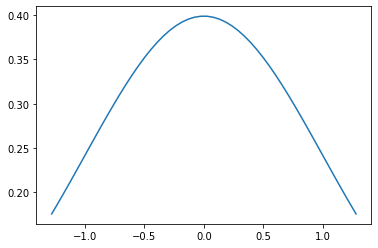

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import norm
y=np.linspace(norm.ppf(0.1),norm.ppf(0.9),50)# z score list 
plt.plot(y,norm.pdf(y))


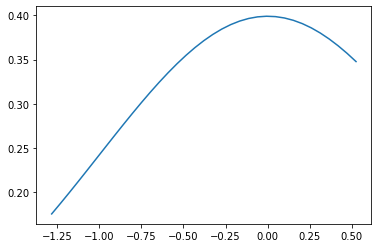

In [20]:
x=np.linspace(norm.ppf(0.1),norm.ppf(0.7),35)# z score list 
plt.plot(x,norm.pdf(x))

In [27]:
_,pval=ttest_1samp(norm,0.7);pval

3.581609464592767e-33

TWO SAMPLE TTEST 

       This is to consider taking two different samples from same group

In [ ]:
from scipy.stats import ttest_ind
ages_sample2=sts.poisson.rvs(loc=18,mu=25,size=60)
_,p3val=ttest_ind(ages_sample2,ages_sample1)
p3val#rejecting null hypothesis- they are different 


1.6111469938240402e-15

PAIRED SAMPLE TTEST 
        
         THIS WILL TAKE TEST BETWEEN TWO FEATURES 

In [ ]:
#LETS TAKE OUR DATASET  -
from scipy.stats import ttest_rel
_,p4val=ttest_rel(df['a'],df['b'])
p4val# the below value is >0.05 and this shows the distribution is very similar, accepting null hypothesis

0.8847439276662898

WHAT ARE THE DIFFERENT FEATURE IMPORTANCE TESTS INVOLVED AS SCKIT FUNCTIONS



       f_classif
          ANOVA F-value between label/feature for classification tasks.

       mutual_info_classif
          Mutual information for a discrete target.

       chi2
          Chi-squared stats of non-negative features for classification tasks.

       f_regression 
          F-value between label/feature for regression tasks.

       mutual_info_regression
          Mutual information for a continuous target.

       SelectPercentile
          Select features based on percentile of the highest scores.

      SelectFpr
          Select features based on a false positive rate test.

      SelectFdr
         Select features based on an estimated false discovery rate.

      SelectFwe
         Select features based on family-wise error rate.

   

In [ ]:
# LETS CONSIDER F_REGRESSION TEST WHICH CONSIDERS THE CORRELATION OF A FEATURE WITH TARGET VARIABLE

from sklearn.feature_selection import f_regression
_,pval=f_regression(df[df.columns[:-1]],df['class'])
pval# respective p values given 


array([6.53958384e-001, 2.76161220e-130])

THERE IS A SKLEARNS KBEST FUNCTION WHICH GIVES THE K BEST FEATURES.
LETS USE IT

In [ ]:
x,y=make_classification(n_samples=1000,n_classes=2,n_features=10,n_redundant=0,random_state=1)
df_x=pd.DataFrame(x,columns=['a','b','c','d','e','f','g','h','i','j']);Y=pd.Series(y)
df_x['class']=Y


In [ ]:
_,pval=f_regression(df_x[df_x.columns[:-1]],df_x['class'])
pval# respective p values given 

array([9.47543373e-002, 1.25301837e-149, 6.11478568e-001, 4.13913137e-001,
       4.08172189e-001, 7.32287975e-001, 4.95536432e-001, 9.20563863e-001,
       6.84429631e-001, 1.91280577e-001])

In [ ]:
from sklearn.feature_selection import SelectKBest
bestfeat=SelectKBest(score_func=f_regression, k=4)
res=bestfeat.fit_transform(df_x[df_x.columns[:-1]],df_x['class'])
bestfeat.get_support(indices=True)


array([0, 1, 4, 9])

In [ ]:
#LETS CONSIDER mutual_info_regression TEST WHICH CONSIDERS THE CORRELATION OF A FEATURE WITH TARGET VARIABLE. THIS INVOLVES THE ENTROPY DROP 
#   WITH THE VARIABLE AND THE TARGET VARIABLE
from sklearn.feature_selection import mutual_info_regression
mutual_info_regression(df_x[df_x.columns[:-1]],df_x['class'],n_neighbors=5,random_state=1)
# zero states indpendent with target variable and more the value more will be the dependency 

array([0.        , 0.32990757, 0.02589101, 0.00317514, 0.02718431,
       0.        , 0.        , 0.01358928, 0.0130853 , 0.        ])

In [ ]:
bestfeat=SelectKBest(score_func=mutual_info_regression,k=4)
res=bestfeat.fit_transform(df_x[df_x.columns[:-1]],df_x['class'])
bestfeat.get_support(indices=True)


array([1, 2, 4, 7])

CHI SQUARE TEST- HELPS TO FIND THE ASSOCIATION BETWEEN TWO FEATURES



In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats

dataset=sns.load_dataset('tips')
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [ ]:
dataset_table.values

array([[60, 97],
       [33, 54]])

In [ ]:
_,pval,dof,arr=stats.chi2_contingency(dataset_table)
pval,dof

(0.925417020494423, 1)

In [ ]:
arr

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [ ]:
# dof is degree of freedom and it is one. How is it arrived
n_rows=len(dataset_table.iloc[:])
n_cols=len(dataset_table.columns)
dof_derive=(n_rows-1)*(n_cols-1)
dof_derive

1

In [ ]:
#finding chi square statistic 
from scipy.stats import chi2
chi_stats=sum([(o-e)**2./e for o,e in zip()])